# Waste Management.  WasteAi

## Here i trained a resnet34 to classify images into Organic  or Recycable classes for Waste management, using Fastai. On my Computer using 12 CPU's. GPU is the way!!

 Please get waste dataset from kaggle : https://www.kaggle.com/techsash/waste-classification-data or find your own :)

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
# batch size
bs = 64

In [18]:
# Geth the data from the path

path = datapath4file('/home/hope-moloko/Datasets/waste-classification-data/DATASET')


In [19]:
path

PosixPath('/home/hope-moloko/Datasets/waste-classification-data/DATASET')

## In our TRAIN data set we have R for Recycle and O for Organic.

In [20]:
(path/'TEST/')

PosixPath('/home/hope-moloko/Datasets/waste-classification-data/DATASET/TEST')

# Load the Data and split Train, Validation and Test + Normalization

In [21]:
tfms = get_transforms(do_flip=False)

data = ImageDataBunch.from_folder(path,train='TRAIN',valid=None,valid_pct=0.2,test='TEST', ds_tfms=tfms,size=224)
data.normalize(imagenet_stats);

# Show some of the objects and their classes

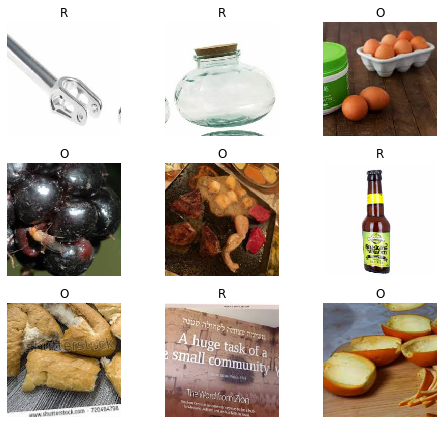

In [8]:
data.show_batch(rows=3, figsize=(7,6))

In [9]:
print(data.classes)
len(data.classes),data.c

['O', 'R']


(2, 2)

# Training: resnet34

In [10]:
learner = cnn_learner(data, models.resnet34, metrics=error_rate)

# Lets train for 3 epochs

In [11]:
learner.fit_one_cycle(3)

In [12]:
learner.save('stage-1')  # Save the weights

In [11]:
learner.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (18052 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
R,R,R,R,R
Path: /home/hope-moloko/Datasets/waste-classification-data/DATASET;

Valid: LabelList (4512 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
R,R,O,O,R
Path: /home/hope-moloko/Datasets/waste-classification-data/DATASET;

Test: LabelList (2513 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /home/hope-moloko/Datasets/waste-classification-data/DATASET, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(k

In [12]:
interp = ClassificationInterpretation.from_learner(learner)  #Interpret the classifier

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

# Check some of the confused classes

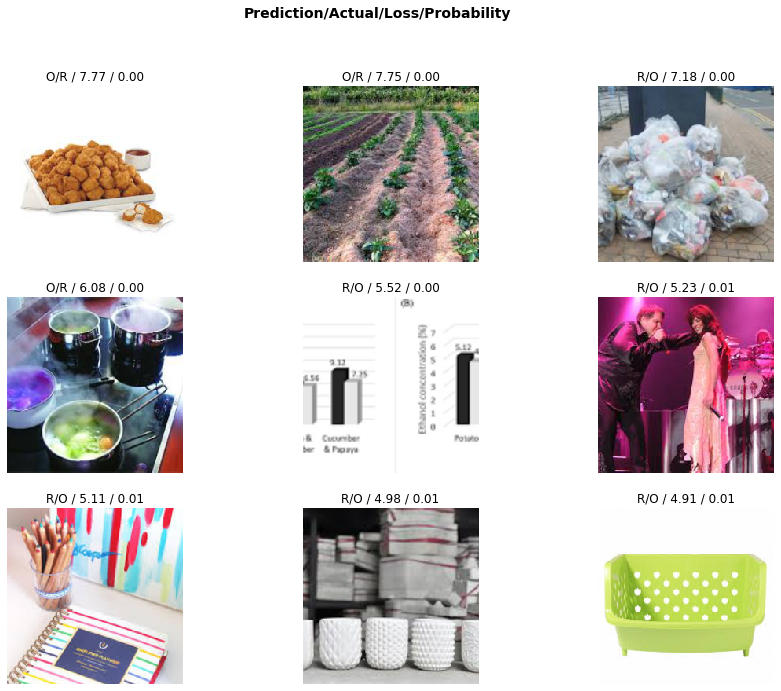

In [111]:
interp.plot_top_losses(9, figsize=(15,11))


# Unfreezing, fine-tuning, and learning rates

In [13]:
learner.freeze()

In [14]:
learner.fit_one_cycle(1)

In [15]:
learner.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (18052 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
R,R,R,R,R
Path: /home/hope-moloko/Datasets/waste-classification-data/DATASET;

Valid: LabelList (4512 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
R,O,R,R,O
Path: /home/hope-moloko/Datasets/waste-classification-data/DATASET;

Test: LabelList (2513 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /home/hope-moloko/Datasets/waste-classification-data/DATASET, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(k

In [16]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


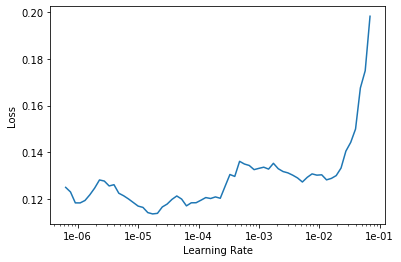

In [17]:
learner.recorder.plot()

In [12]:
min_lr = 1e-06
max_lr = 1e-03

learner.unfreeze()  #

learner.fit_one_cycle(2, max_lr=slice(min_lr,max_lr))  # Train again, No GPU so use low epochs

In [23]:
interp = ClassificationInterpretation.from_learner(learner)

# Lets check the Confusion matrix

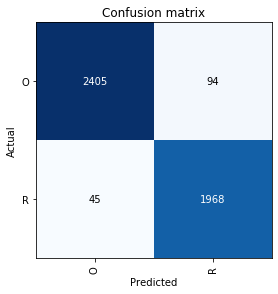

In [24]:
interp.plot_confusion_matrix()

## Show some results from the Classifier

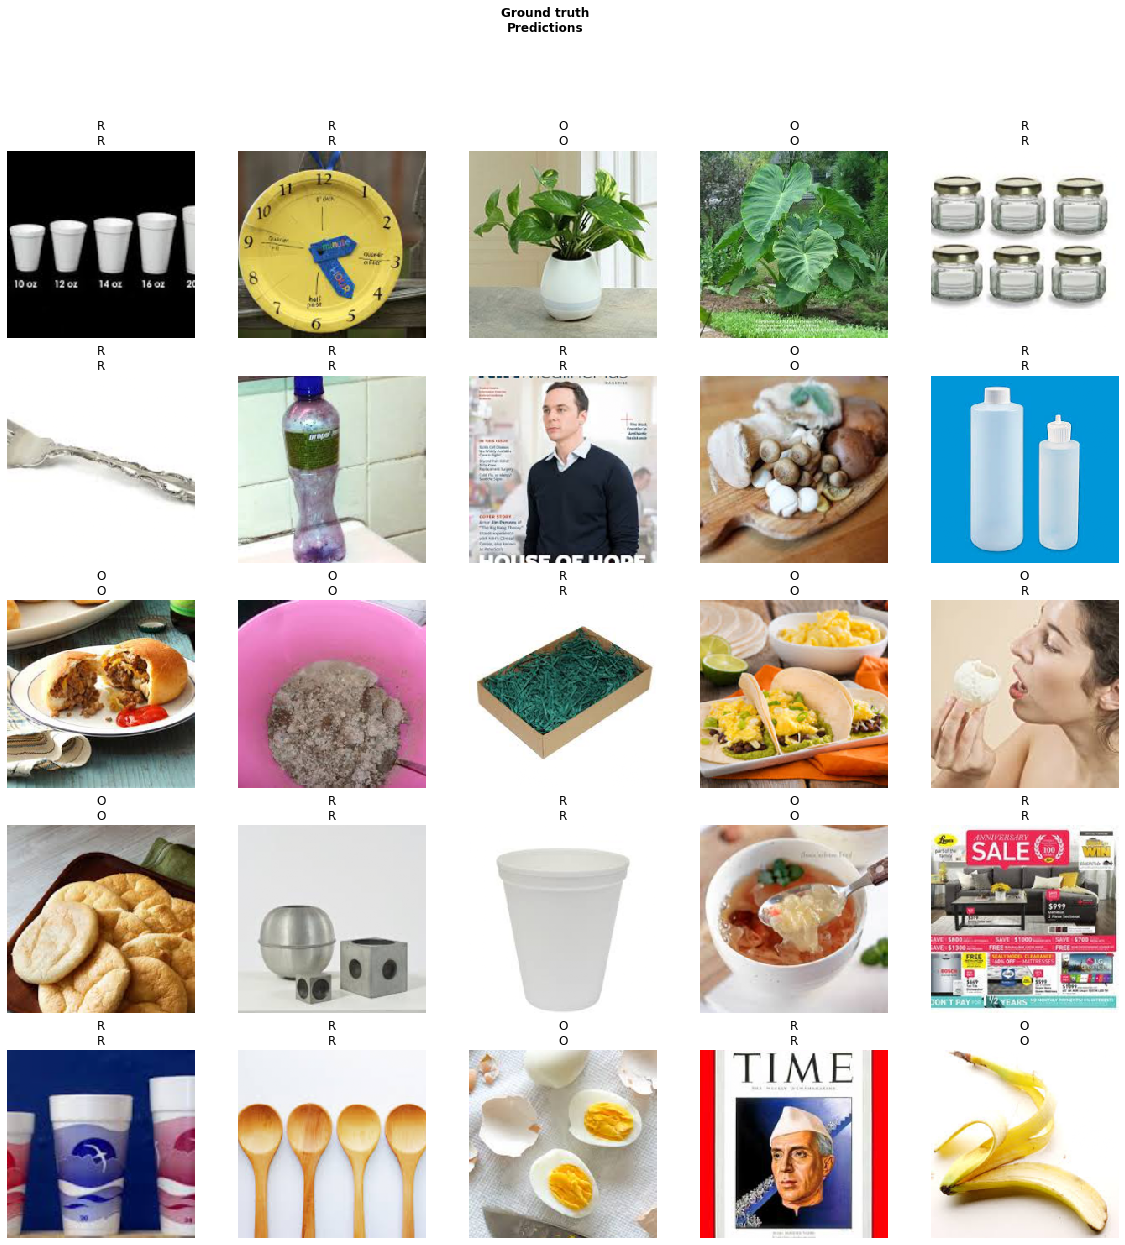

In [60]:
learner.show_results()

# Test with new images

In [43]:
doc(ImageImageList.from_folder)

In [25]:
data_test = ImageImageList.from_folder('TEST/')

In [108]:
pic_number = 9
pred = learner.predict(data_test[pic_number])

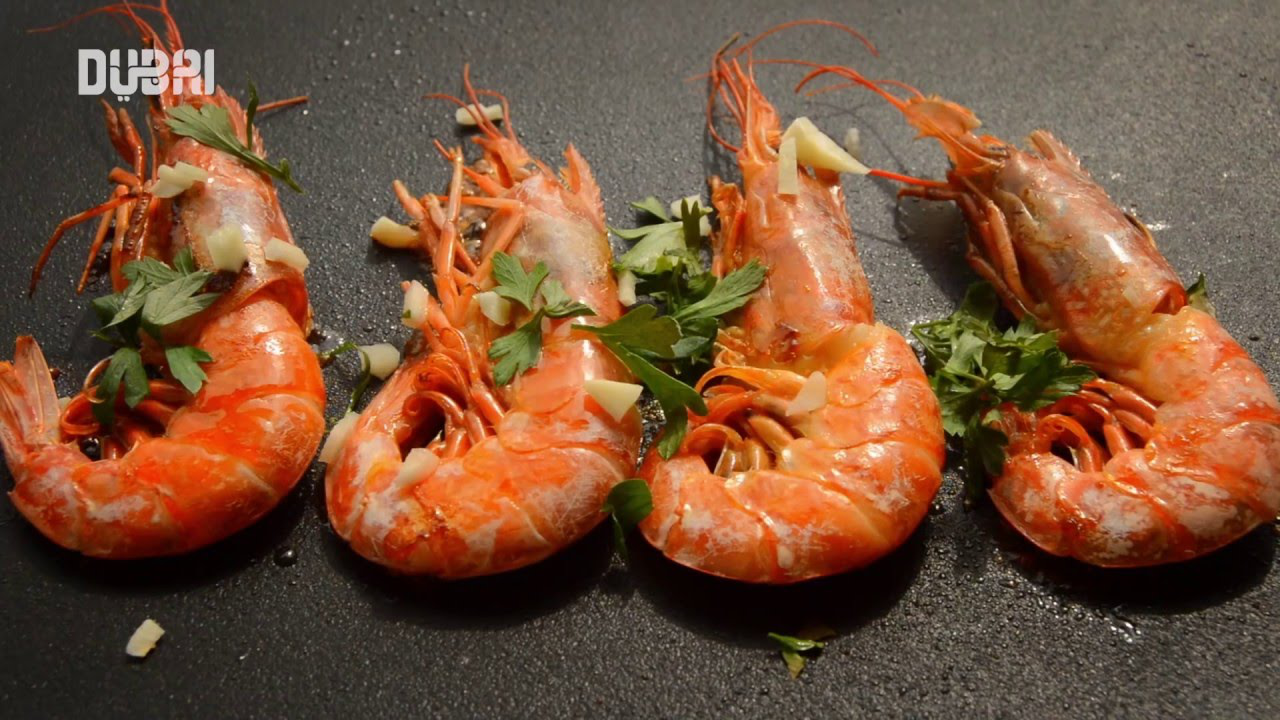

In [109]:
data_test.open(data_test.items[pic_number]) 

# Class , two classes only [O,R] -- O-Organic and R- Recycel

In [115]:
Class = pred[0]
probability_of_Organic = pred[2][0]
probability_of_Recycle = pred[2][1]

In [118]:
print('Predicted Class :{} , Organic:{} , Recycle:{}'.format(Class , probability_of_Organic , probability_of_Recycle))

Predicted Class :O , Organic:0.9996473789215088 , Recycle:0.0003526395885273814


# GPU + more data  -> Better results. Heck away!!